In [89]:
import pandas as pd
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import v2
from torchvision import transforms
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import CustomClass

In [90]:
data_path = './data/archive (1)/'
labels = pd.read_json(data_path+'v011_labels_small.json', typ='series')

In [91]:
baseTF = v2.Compose(transforms=
                                 [transforms.ToTensor(),
                                  v2.Resize(size=[64,128])
                                  ])
imshowTF = transforms.ToPILImage()

In [92]:
img_name_list = os.listdir(data_path+'dataset/v011_words_small')

In [93]:
img_list = []

In [94]:
for img_name in img_name_list:
    img = Image.open(data_path+'dataset/v011_words_small/'+img_name)
    img_list.append(baseTF(img).numpy())
    img.close()

In [95]:
img_TS = torch.tensor(img_list)

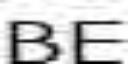

In [96]:
imshowTF(img_TS[0])

image transform을 이용한 data agumentation 시도

In [97]:
testTF1 = v2.Pad(10)
testTF2 = v2.RandomPerspective(p=1.0)
testTF3 = v2.RandomRotation(degrees=(0,360))
testTF4 = v2.ColorJitter(brightness=5)
testTF5 = v2.ColorJitter(contrast=5)
testTF6 = v2.ColorJitter(saturation=1)
testTF7 = v2.ColorJitter(hue=0.3)  

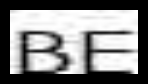

In [98]:
imshowTF(testTF1(img_TS[0]))

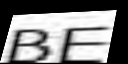

In [99]:
imshowTF(testTF2(img_TS[0]))

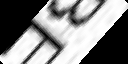

In [100]:
imshowTF(testTF3(img_TS[0]))

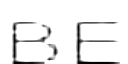

In [101]:
imshowTF(testTF4(img_TS[0]))

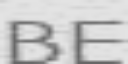

In [102]:
imshowTF(testTF5(img_TS[0]))

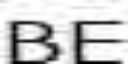

In [103]:
imshowTF(testTF6(img_TS[0]))

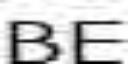

In [104]:
imshowTF(testTF7(img_TS[0]))

In [105]:
testTF5(img_TS[0]).shape

torch.Size([3, 64, 128])

In [106]:
img_TS[0].shape

torch.Size([3, 64, 128])

In [148]:
randomTF = v2.Compose(
    transforms=[
        v2.RandomPerspective(distortion_scale=0.3, p=0.5),
        v2.RandomRotation(degrees=(10,360))
    ]
)

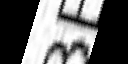

In [165]:
imshowTF(randomTF(img_TS[0]))